Importing

In [1]:
#Importing required libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import time

Loading the dataset

In [4]:
#Load Dataset & Analyze
data_dir ="Dataset"

#List all classes(disease categories)
classes = os.listdir(data_dir)
print(f"Number of classes:{len(classes)}")
print("classes:",classes[:4])

#Count images in each class (display first few)
for cls in classes[:5]:
    print(f"{cls}: {len(os.listdir(os.path.join(data_dir, cls)))} images")

Number of classes:5
classes: ['Potato___healthy', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Early_blight']
Potato___healthy: 152 images
Potato___Late_blight: 1000 images
Tomato___Bacterial_spot: 2127 images
Tomato___Early_blight: 1000 images
Tomato___healthy: 1591 images


In [5]:
print(len(os.listdir(data_dir)))

5


Load and Preprocess Image (Enclosed Labels)

In [6]:
cls_path = os.path.join(data_dir, cls)
cls_path

'Dataset\\Tomato___healthy'

In [10]:
for cls in classes:
    print(cls)
    #cls_path=os.path.join(data_dir, cls)

Potato___healthy
Potato___Late_blight
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy


In [15]:
for cls in classes[:1]:
    cls_path=os.path.join(data_dir, cls)
    print(cls_path)
    print (os.listdir(cls_path))

Dataset\Potato___healthy
['00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG', '03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG', '04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL 1930.JPG', '046641c1-f837-49eb-b5f2-4109910a027c___RS_HL 1878.JPG', '07dfb451-4378-49d1-b699-33a5fc49ff07___RS_HL 5399.JPG', '0b3e5032-8ae8-49ac-8157-a1cac3df01dd___RS_HL 1817.JPG', '0be9d721-82f5-42c3-b535-7494afe01dbe___RS_HL 1814.JPG', '0f4ebc5a-d646-436a-919d-961342997cde___RS_HL 4183.JPG', '1106c3fc-92cb-41a6-a6c6-8f08b9b45108___RS_HL 1914.JPG', '111cd9d8-4d27-4225-be9e-d29b21cf56b9___RS_HL 5419.JPG', '142fb983-2166-4a0f-b99b-a6c21e99987e___RS_HL 5398.JPG', '14484ea5-9c34-427c-abe4-2743265aced0___RS_HL 4204.JPG', '144d2475-21ab-4bdc-a67c-9672a9b711e6___RS_HL 5376.JPG', '163ada72-4288-4f85-a3c1-feed23c8d1de___RS_HL 1940.JPG', '170f1f57-0fd4-421f-9c82-3b1804be63ad___RS_HL 1771.JPG', '1a1184f8-c414-4ead-a4c4-41ae78e29a82___RS_HL 1971.JPG', '1ae826e2-5148-47bd-a44c-711ec9cc9c75___RS_HL 1954.JPG', '1b43

In [9]:
x=[]
y=[]

s = time.time()
j = 0
for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    j+=1
    i=0
    for img_name in os.listdir(cls_path)[:500]: #Limit for faster processing
        img_path = os.path.join(cls_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            x.append(img)
            y.append(cls)
            i+=1
    print(f'Loaded {i} images of class {j} - {cls} in {np.round((time.time() -s)/60, 2)} minutes')

Loaded 152 images of class 1 - Potato___healthy in 0.03 minutes
Loaded 500 images of class 2 - Potato___Late_blight in 0.12 minutes
Loaded 500 images of class 3 - Tomato___Bacterial_spot in 0.2 minutes
Loaded 500 images of class 4 - Tomato___Early_blight in 0.28 minutes
Loaded 500 images of class 5 - Tomato___healthy in 0.36 minutes


In [16]:
#Prepare a numpy array
type(x), type(x[0]), type(x[0].shape)

(list, numpy.ndarray, tuple)

In [18]:
#Prepare a numpy array
type(x), type(x[0]), x[0].shape

(numpy.ndarray, numpy.ndarray, (256, 256, 3))

In [17]:
x = np.array(x)
y = np.array(y)
print("Image data shape:",x.shape)

Image data shape: (2152, 256, 256, 3)


In [19]:
#Encode Labels 
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
print("Enclosed classes:", encoder.classes_)

Enclosed classes: ['Potato___Late_blight' 'Potato___healthy' 'Tomato___Bacterial_spot'
 'Tomato___Early_blight' 'Tomato___healthy']


In [20]:
y_encoded

array([1, 1, 1, ..., 4, 4, 4], shape=(2152,))

In [21]:
y_encoded.tolist()

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [22]:
#save the encoded Labels
joblib.dump(encoder, "label_encoder.pkl")

['label_encoder.pkl']

ML (Color Histograms)

Extracting Features(Feature Engineering)

In [23]:
#Extract Color Histogram Features
features = []
for img in x:
    hsv_img = cv2.cvtColor((img).astype('uint8'), cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv_img],[0,1,2], None, [8,8,8], [0,256,0,256,0,256])
    hist = cv2.normalize(hist, hist).flatten()
    features.append(hist)

features = np.array(features)
print("Feature shape:", features.shape)

Feature shape: (2152, 512)


Split for Train and Test sets

In [24]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, y_encoded, test_size=0.2, random_state=42, stratify = y)

In [19]:
#  save as pkl files for deployment
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_test, "y_test.pkl")

['y_test.pkl']

In [20]:
print('X train: ', X_train.shape, X_train[0].shape)
print('Y train: ', y_train.shape, end = '\n'*2)
print('X test: ', X_test.shape, X_test[0].shape)
print('Y test: ', y_test.shape)

X train:  (1721, 512) (512,)
Y train:  (1721,)

X test:  (431, 512) (512,)
Y test:  (431,)


Train the Model

In [21]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [22]:
# save the model for deployment
joblib.dump(model, "model.pkl")

['model.pkl']

In [23]:
# # Train Logistic Regression Model
# from sklearn.linear_model import LogisticRegression

# model_lr = LogisticRegression(max_iter=500)
# model_lr.fit(X_train_ml, y_train_ml)

Prediction Results and Model Evaluation

In [24]:
# Predict 
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", np.round(accuracy_score(y_test, y_pred)*100, 2))
print(classification_report(y_test, y_pred))

Accuracy: 89.56
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       100
           1       0.83      0.77      0.80        31
           2       0.94      0.94      0.94       100
           3       0.86      0.88      0.87       100
           4       0.94      0.97      0.96       100

    accuracy                           0.90       431
   macro avg       0.89      0.88      0.88       431
weighted avg       0.89      0.90      0.90       431



In [25]:
# single prediction
# test_img = np.array(np.arange(512))  # random array
test_img = X_test[46]
model.predict(test_img.reshape(1,-1))

array([3])

Confusion Matrix

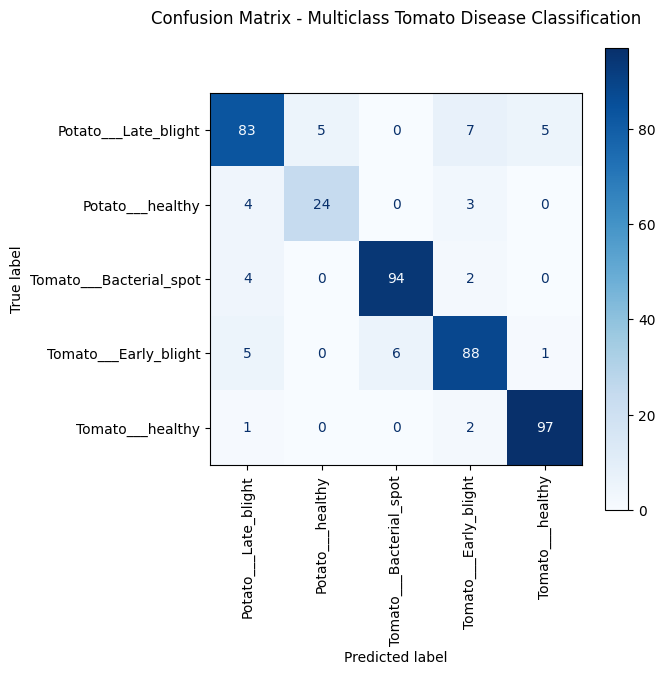

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

# Inverse transform to get class labels (if needed)
y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

# Generate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=encoder.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix - Multiclass Tomato Disease Classification", pad = 50)
plt.show()


Final Dataframe

In [28]:
final_df = pd.DataFrame(data = {'Image': y_test, 'Actual': encoder.inverse_transform(y_test), 'Predicted':encoder.inverse_transform(y_pred)})
final_df

Image                   Actual                Predicted
0        4         Tomato___healthy         Tomato___healthy
1        2  Tomato___Bacterial_spot  Tomato___Bacterial_spot
2        4         Tomato___healthy         Tomato___healthy
3        1         Potato___healthy         Potato___healthy
4        3    Tomato___Early_blight    Tomato___Early_blight
..     ...                      ...                      ...
426      2  Tomato___Bacterial_spot  Tomato___Bacterial_spot
427      4         Tomato___healthy         Tomato___healthy
428      2  Tomato___Bacterial_spot  Tomato___Bacterial_spot
429      0     Potato___Late_blight     Potato___Late_blight
430      2  Tomato___Bacterial_spot  Tomato___Bacterial_spot

[431 rows x 3 columns]